In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

caminho = "/content/drive/MyDrive/academia/dataset_crawler-google-places.json"
df = pd.read_json(caminho)
df.head()


,title,price,categoryName,address,neighborhood,street,city,postalCode,state,countryCode,...,gasPrices,url,searchPageUrl,searchString,language,rank,isAdvertisement,imageUrl,kgmid,reviewsDistribution
0,Academia Nação Fitness,NaN,Academia,"Av. Montreal - Res. Canadá, Goiânia - GO, 7437...",Residencial Canadá,Av. Montreal,Goiânia,74370-610,Goiás,BR,...,[],https://www.google.com/maps/search/?api=1&quer...,https://www.google.com/maps/search/academia/@-...,academia,pt-BR,1,False,https://lh3.googleusercontent.com/gps-cs-s/AG0...,/g/11g2s6m60t,NaN
1,DRIP FITNESS,NaN,Academia,"Av. Seringueiras, qd 06 - lt 20 - Res. Fortevi...",Residencial Forteville,"Av. Seringueiras, qd 06 - lt 20",Goiânia,74370-703,Goiás,BR,...,[],https://www.google.com/maps/search/?api=1&quer...,https://www.google.com/maps/search/academia/@-...,academia,pt-BR,2,False,https://lh3.googleusercontent.com/gps-cs-s/AG0...,/g/11t2f388ml,NaN
2,Equilibrium Academia,NaN,Academia,"Av. São Luiz, Qd 01 - Lt 17/06 - Moinho dos Ve...",Moinho dos Ventos,"Av. São Luiz, Qd 01 - Lt 17/06",Goiânia,74371-440,Goiás,BR,...,[],https://www.google.com/maps/search/?api=1&quer...,https://www.google.com/maps/search/academia/@-...,academia,pt-BR,3,False,https://lh3.googleusercontent.com/gps-cs-s/AG0...,/g/11s1t74c0d,NaN
3,R1 Fitness - Unidade Katia,NaN,Sala de fitness,"Avenida Americano do Brasil, Quadra 02, Lote 1...",Parque Santa Rita,"Avenida Americano do Brasil, Quadra 02, Lote 1...",Goiânia,None,GO,BR,...,[],https://www.google.com/maps/search/?api=1&quer...,https://www.google.com/maps/search/academia/@-...,academia,pt-BR,4,False,https://lh3.googleusercontent.com/gps-cs-s/AG0...,/g/11b6hyq1rc,NaN
4,Step form academia,NaN,Academia,"R. MDV 6, 456 - Res. Canadá, Goiânia - GO, 743...",Residencial Canadá,"R. MDV 6, 456",Goiânia,74371-390,Goiás,BR,...,[],https://www.google.com/maps/search/?api=1&quer...,https://www.google.com/maps/search/academia/@-...,academia,pt-BR,5,False,https://streetviewpixels-pa.googleapis.com/v1/...,/g/11sc2pq_8w,NaN


📁 Arquivo encontrado. Carregando JSON...
✅ Dados carregados com sucesso!

===== SHAPE DO DATASET =====
(35, 43) 

===== TIPOS DE DADOS =====
title                   object
price                  float64
categoryName            object
address                 object
neighborhood            object
street                  object
city                    object
postalCode              object
state                   object
countryCode             object
website                 object
phone                   object
phoneUnformatted       float64
claimThisBusiness         bool
location                object
totalScore             float64
permanentlyClosed         bool
temporarilyClosed         bool
placeId                 object
categories              object
fid                     object
cid                    float64
reviewsCount             int64
imagesCount            float64
imageCategories         object
scrapedAt               object
googleFoodUrl          float64
hotelAds              

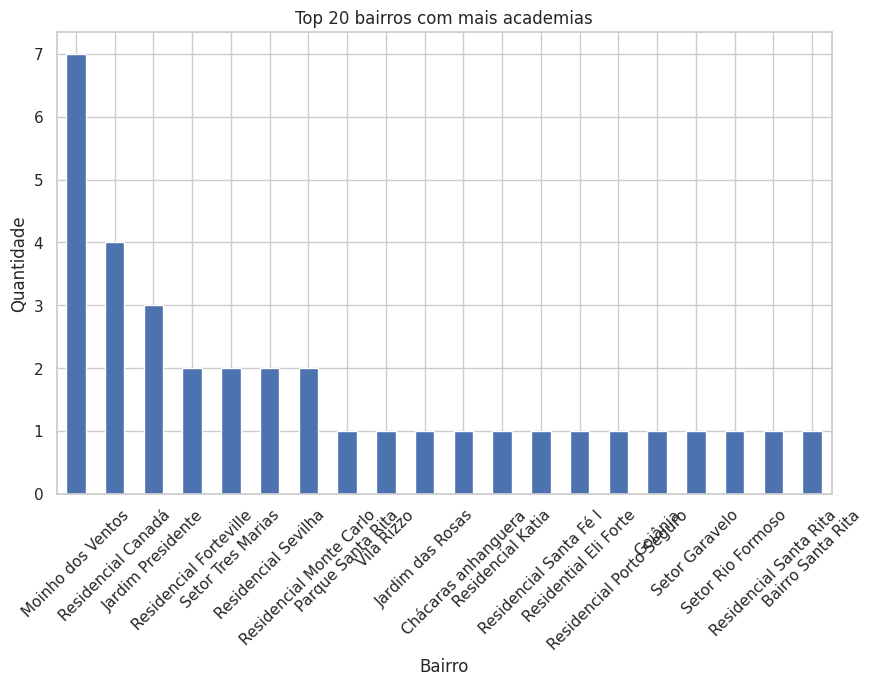

===== INSIGHTS RÁPIDOS =====
🏙️ Total de cidades únicas: 1
📍 Total de bairros únicos: 20
🏋️ Total de academias no dataset: 35

🎉 EDA concluída com sucesso!


In [5]:
"""
Script didático de EDA (Análise Exploratória de Dados) para o dataset do Google Places (ACADEMIAS).

O QUE ESTE ARQUIVO FAZ:
1) Carrega o JSON com os dados obtidos pelo crawler.
2) Mostra informações gerais: shape, dtypes, colunas, e primeiras linhas (head).
3) Calcula estatísticas descritivas (.describe()) das colunas numéricas.
4) Faz contagem de valores (.value_counts()) nas colunas categóricas principais:
       - categoryName
       - neighborhood
       - city
5) Detecta outliers usando o método IQR (Interquartile Range) em colunas numéricas:
       - rating
       - reviewsCount
6) Gera visualizações (histogramas, boxplots e gráficos de barras) usando SEABORN + MATPLOTLIB.
7) Apresenta insights simples baseados no dataset.
"""

# -------------------------------------------------------------------
# 1) IMPORTAÇÕES BÁSICAS
# -------------------------------------------------------------------

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# -------------------------------------------------------------------
# 2) CAMINHO DO ARQUIVO (AJUSTADO PARA GOOGLE COLAB)
# -------------------------------------------------------------------

FILE_PATH = "/content/drive/MyDrive/academia/dataset_crawler-google-places.json"

# -------------------------------------------------------------------
# 3) CARREGAMENTO DO DATASET
# -------------------------------------------------------------------

if not os.path.exists(FILE_PATH):
    raise FileNotFoundError(f"O arquivo não foi encontrado no caminho:\n{FILE_PATH}")

print("📁 Arquivo encontrado. Carregando JSON...")

df = pd.read_json(FILE_PATH)

print("✅ Dados carregados com sucesso!\n")

# -------------------------------------------------------------------
# 4) INFORMAÇÕES GERAIS DO DATASET
# -------------------------------------------------------------------

print("===== SHAPE DO DATASET =====")
print(df.shape, "\n")

print("===== TIPOS DE DADOS =====")
print(df.dtypes, "\n")

print("===== PRIMEIRAS 5 LINHAS =====")
print(df.head(), "\n")

print("===== COLUNAS DISPONÍVEIS =====")
print(df.columns.tolist(), "\n")

# -------------------------------------------------------------------
# 5) ESTATÍSTICAS DESCRITIVAS
# -------------------------------------------------------------------

print("===== ESTATÍSTICAS NUMÉRICAS =====")
print(df.describe(), "\n")

# -------------------------------------------------------------------
# 6) VALORES CATEGÓRICOS - FREQUÊNCIAS
# -------------------------------------------------------------------

print("===== FREQUÊNCIA POR categoryName =====")
print(df['categoryName'].value_counts(), "\n")

print("===== FREQUÊNCIA POR BAIRRO =====")
print(df['neighborhood'].value_counts().head(20), "\n")

print("===== FREQUÊNCIA POR CIDADE =====")
print(df['city'].value_counts(), "\n")

# -------------------------------------------------------------------
# 7) DETECÇÃO DE OUTLIERS (IQR)
# -------------------------------------------------------------------

def detectar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

colunas_numericas = ['rating', 'reviewsCount']

for coluna in colunas_numericas:
    if coluna in df.columns:
        print(f"===== OUTLIERS EM {coluna} =====")
        out = detectar_outliers(df, coluna)
        print(f"Total de outliers encontrados: {len(out)}\n")

# -------------------------------------------------------------------
# 8) VISUALIZAÇÕES
# -------------------------------------------------------------------

# HISTOGRAMA DE NOTAS
if 'rating' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['rating'], kde=True)
    plt.title("Distribuição das Avaliações (rating)")
    plt.show()

# TOP 20 BAIRROS COM MAIS ACADEMIAS
plt.figure(figsize=(10,6))
df['neighborhood'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 bairros com mais academias")
plt.xlabel("Bairro")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()

# BOXPLOT DAS NOTAS
if 'rating' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df['rating'])
    plt.title("Boxplot das Avaliações (rating)")
    plt.show()

# SCATTER: Rating x Reviews
if 'rating' in df.columns and 'reviewsCount' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=df['reviewsCount'], y=df['rating'])
    plt.title("Scatterplot: Reviews Count x Rating")
    plt.xlabel("Quantidade de Avaliações")
    plt.ylabel("Rating")
    plt.show()

# -------------------------------------------------------------------
# 9) INSIGHTS RÁPIDOS
# -------------------------------------------------------------------

print("===== INSIGHTS RÁPIDOS =====")

if "rating" in df.columns:
    print(f"⭐ Nota média das academias: {df['rating'].mean():.2f}")

print(f"🏙️ Total de cidades únicas: {df['city'].nunique()}")

print(f"📍 Total de bairros únicos: {df['neighborhood'].nunique()}")

print(f"🏋️ Total de academias no dataset: {len(df)}")

print("\n🎉 EDA concluída com sucesso!")


In [6]:
# 2) CHECAGEM BÁSICA DO ARQUIVO E LEITURA

# Verifica se o arquivo existe no caminho especificado.
if not os.path.exists(FILE_PATH):
    raise FileNotFoundError(
        f"Arquivo não encontrado em: {FILE_PATH}\n"
        f"-> Verifique se o arquivo está em /content/drive/MyDrive/academia/"
    )

# Lê o JSON como DataFrame
df = pd.read_json(FILE_PATH, orient="records")

# Mostra as 5 primeiras linhas
print("\n=== PRÉ-VISUALIZAÇÃO: df.head() ===")
display(df.head())

# Formato do DataFrame
print("\n=== FORMATO DO DATAFRAME: df.shape ===")
print(df.shape)

# Tipos de dados
print("\n=== TIPOS DE DADOS: df.dtypes ===")
print(df.dtypes)



=== PRÉ-VISUALIZAÇÃO: df.head() ===


,title,price,categoryName,address,neighborhood,street,city,postalCode,state,countryCode,...,gasPrices,url,searchPageUrl,searchString,language,rank,isAdvertisement,imageUrl,kgmid,reviewsDistribution
0,Academia Nação Fitness,NaN,Academia,"Av. Montreal - Res. Canadá, Goiânia - GO, 7437...",Residencial Canadá,Av. Montreal,Goiânia,74370-610,Goiás,BR,...,[],https://www.google.com/maps/search/?api=1&quer...,https://www.google.com/maps/search/academia/@-...,academia,pt-BR,1,False,https://lh3.googleusercontent.com/gps-cs-s/AG0...,/g/11g2s6m60t,NaN
1,DRIP FITNESS,NaN,Academia,"Av. Seringueiras, qd 06 - lt 20 - Res. Fortevi...",Residencial Forteville,"Av. Seringueiras, qd 06 - lt 20",Goiânia,74370-703,Goiás,BR,...,[],https://www.google.com/maps/search/?api=1&quer...,https://www.google.com/maps/search/academia/@-...,academia,pt-BR,2,False,https://lh3.googleusercontent.com/gps-cs-s/AG0...,/g/11t2f388ml,NaN
2,Equilibrium Academia,NaN,Academia,"Av. São Luiz, Qd 01 - Lt 17/06 - Moinho dos Ve...",Moinho dos Ventos,"Av. São Luiz, Qd 01 - Lt 17/06",Goiânia,74371-440,Goiás,BR,...,[],https://www.google.com/maps/search/?api=1&quer...,https://www.google.com/maps/search/academia/@-...,academia,pt-BR,3,False,https://lh3.googleusercontent.com/gps-cs-s/AG0...,/g/11s1t74c0d,NaN
3,R1 Fitness - Unidade Katia,NaN,Sala de fitness,"Avenida Americano do Brasil, Quadra 02, Lote 1...",Parque Santa Rita,"Avenida Americano do Brasil, Quadra 02, Lote 1...",Goiânia,None,GO,BR,...,[],https://www.google.com/maps/search/?api=1&quer...,https://www.google.com/maps/search/academia/@-...,academia,pt-BR,4,False,https://lh3.googleusercontent.com/gps-cs-s/AG0...,/g/11b6hyq1rc,NaN
4,Step form academia,NaN,Academia,"R. MDV 6, 456 - Res. Canadá, Goiânia - GO, 743...",Residencial Canadá,"R. MDV 6, 456",Goiânia,74371-390,Goiás,BR,...,[],https://www.google.com/maps/search/?api=1&quer...,https://www.google.com/maps/search/academia/@-...,academia,pt-BR,5,False,https://streetviewpixels-pa.googleapis.com/v1/...,/g/11sc2pq_8w,NaN



=== FORMATO DO DATAFRAME: df.shape ===
(35, 43)

=== TIPOS DE DADOS: df.dtypes ===
title                   object
price                  float64
categoryName            object
address                 object
neighborhood            object
street                  object
city                    object
postalCode              object
state                   object
countryCode             object
website                 object
phone                   object
phoneUnformatted       float64
claimThisBusiness         bool
location                object
totalScore             float64
permanentlyClosed         bool
temporarilyClosed         bool
placeId                 object
categories              object
fid                     object
cid                    float64
reviewsCount             int64
imagesCount            float64
imageCategories         object
scrapedAt               object
googleFoodUrl          float64
hotelAds                object
openingHours            object
peopleAlsoSearch 

In [7]:
# 3) SELEÇÃO DE COLUNAS NUMÉRICAS E CATEGÓRICAS (USO DIDÁTICO)

# Seleciona automaticamente todas as colunas numéricas do DataFrame.
# include="number" pega int64, float64 etc.
# Isso permite descobrir dinamicamente o que é número sem ter que olhar manualmente.
colunas_numericas = df.select_dtypes(include="number").columns.tolist()

# Seleciona todas as colunas NÃO numéricas.
# exclude="number" mantém strings (object), booleanos, listas embutidas e datas em texto.
colunas_categoricas = df.select_dtypes(exclude="number").columns.tolist()

print("\n=== COLUNAS NUMÉRICAS ===")
print(colunas_numericas)

print("\n=== COLUNAS CATEGÓRICAS ===")
print(colunas_categoricas)



=== COLUNAS NUMÉRICAS ===
['price', 'phoneUnformatted', 'totalScore', 'cid', 'reviewsCount', 'imagesCount', 'googleFoodUrl', 'rank']

=== COLUNAS CATEGÓRICAS ===
['title', 'categoryName', 'address', 'neighborhood', 'street', 'city', 'postalCode', 'state', 'countryCode', 'website', 'phone', 'claimThisBusiness', 'location', 'permanentlyClosed', 'temporarilyClosed', 'placeId', 'categories', 'fid', 'imageCategories', 'scrapedAt', 'hotelAds', 'openingHours', 'peopleAlsoSearch', 'placesTags', 'reviewsTags', 'additionalInfo', 'gasPrices', 'url', 'searchPageUrl', 'searchString', 'language', 'isAdvertisement', 'imageUrl', 'kgmid', 'reviewsDistribution']


In [8]:
# 4) ESTATÍSTICAS DESCRITIVAS NAS COLUNAS NUMÉRICAS

# Aqui reutilizamos colunas_numericas obtidas no passo anterior.
# Se quiser garantir que está atualizado, reexecute a seleção:
colunas_numericas = df.select_dtypes(include="number").columns.tolist()

print("\n=== ESTATÍSTICAS DESCRITIVAS (APENAS COLUNAS NUMÉRICAS) ===")

# .describe() gera estatísticas clássicas para cada coluna numérica:
# count  -> quantidade de valores existentes (não nulos)
# mean   -> média
# std    -> desvio-padrão (medida de dispersão dos valores)
# min    -> menor valor
# 25%    -> primeiro quartil
# 50%    -> mediana
# 75%    -> terceiro quartil
# max    -> maior valor
#
# Importante: o describe ignora valores NaN automaticamente.
estatisticas_numericas = df[colunas_numericas].describe()

print(estatisticas_numericas)



=== ESTATÍSTICAS DESCRITIVAS (APENAS COLUNAS NUMÉRICAS) ===
       price  phoneUnformatted  totalScore           cid  reviewsCount  \
count    0.0      3.000000e+01   31.000000  3.500000e+01     35.000000   
mean     NaN      4.728527e+12    4.735484  9.489375e+18     46.914286   
std      NaN      1.897806e+12    0.265265  5.156446e+18     75.411175   
min      NaN      5.562202e+11    4.000000  8.440899e+16      0.000000   
25%      NaN      5.562981e+12    4.600000  6.142867e+18      3.500000   
50%      NaN      5.562982e+12    4.800000  9.569462e+18     23.000000   
75%      NaN      5.562986e+12    5.000000  1.327998e+19     39.500000   
max      NaN      5.562996e+12    5.000000  1.759845e+19    382.000000   

       imagesCount  googleFoodUrl       rank  
count    34.000000            0.0  35.000000  
mean     35.558824            NaN  23.342857  
std      83.821307            NaN  16.086061  
min       1.000000            NaN   1.000000  
25%       3.250000            NaN   9

In [9]:
# 5) CONTAGEM DE VALORES (.value_counts) EM ALGUMAS COLUNAS

# Lista das colunas que queremos analisar com .value_counts()
colunas_para_contagem = []

# Verifica e adiciona colunas relevantes caso existam no DataFrame

if "categoryName" in df.columns:
    colunas_para_contagem.append("categoryName")

if "city" in df.columns:
    colunas_para_contagem.append("city")

if "neighborhood" in df.columns:   # muito útil para academias
    colunas_para_contagem.append("neighborhood")

if "state" in df.columns:
    colunas_para_contagem.append("state")

# Loop para exibir contagens e gerar DataFrames de frequências
for col in colunas_para_contagem:
    vc = df[col].value_counts(dropna=False)

    print(f"\n=== VALUE_COUNTS: {col} ===")
    print(vc)

    # Transforma a Series em DataFrame
    vc_df = vc.reset_index()
    vc_df.columns = [col, "frequencia"]

    # Exibe o DataFrame organizado
    print("\nDataFrame organizado:")
    print(vc_df)



=== VALUE_COUNTS: categoryName ===
categoryName
Academia                          23
Sala de fitness                    4
Escola de jiu-jitsu                2
Academia de artes marciais         2
Estúdio de pilates                 2
Academia de Muay Thai              1
Academia de ginástica olímpica     1
Name: count, dtype: int64

DataFrame organizado:
                     categoryName  frequencia
0                        Academia          23
1                 Sala de fitness           4
2             Escola de jiu-jitsu           2
3      Academia de artes marciais           2
4              Estúdio de pilates           2
5           Academia de Muay Thai           1
6  Academia de ginástica olímpica           1

=== VALUE_COUNTS: city ===
city
Goiânia    35
Name: count, dtype: int64

DataFrame organizado:
      city  frequencia
0  Goiânia          35

=== VALUE_COUNTS: neighborhood ===
neighborhood
Moinho dos Ventos           7
Residencial Canadá          4
Jardim Presidente       

In [10]:
# 6) DETECÇÃO SIMPLES DE OUTLIERS PELO MÉTODO IQR (adaptado)

def detectar_outliers_iqr(serie):
    serie_num = pd.to_numeric(serie, errors="coerce")

    Q1 = serie_num.quantile(0.25)
    Q3 = serie_num.quantile(0.75)
    IQR = Q3 - Q1

    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    mascara = (serie_num < lim_inf) | (serie_num > lim_sup)

    return pd.DataFrame({
        "valor": serie_num,
        "e_outlier": mascara,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "limite_inferior": lim_inf,
        "limite_superior": lim_sup
    })


# --- APLICAÇÃO AUTOMÁTICA NAS COLUNAS NUMÉRICAS DO DATAFRAME ---

print("\n=== DETECÇÃO DE OUTLIERS (IQR) NAS COLUNAS NUMÉRICAS ===")

outliers_resultados = {}  # dicionário para guardar os DataFrames individuais

for coluna in colunas_numericas:
    print(f"\n→ Analisando coluna: {coluna}")

    resultado = detectar_outliers_iqr(df[coluna])

    # Guarda o DataFrame no dicionário
    outliers_resultados[coluna] = resultado

    # Conta quantos outliers foram detectados
    qtd_outliers = resultado["e_outlier"].sum()

    print(f"Outliers encontrados: {qtd_outliers}")

    # Exibe apenas os valores considerados outliers (se houver)
    if qtd_outliers > 0:
        print(resultado[resultado["e_outlier"] == True])
    else:
        print("Nenhum outlier detectado.")



=== DETECÇÃO DE OUTLIERS (IQR) NAS COLUNAS NUMÉRICAS ===

→ Analisando coluna: price
Outliers encontrados: 0
Nenhum outlier detectado.

→ Analisando coluna: phoneUnformatted
Outliers encontrados: 9
           valor  e_outlier            Q1            Q3        IQR  \
1   5.562994e+12       True  5.562981e+12  5.562986e+12  4851829.0   
2   5.562359e+11       True  5.562981e+12  5.562986e+12  4851829.0   
7   5.562310e+11       True  5.562981e+12  5.562986e+12  4851829.0   
8   5.562329e+11       True  5.562981e+12  5.562986e+12  4851829.0   
9   5.562202e+11       True  5.562981e+12  5.562986e+12  4851829.0   
13  5.562321e+11       True  5.562981e+12  5.562986e+12  4851829.0   
18  5.562996e+12       True  5.562981e+12  5.562986e+12  4851829.0   
20  5.562994e+12       True  5.562981e+12  5.562986e+12  4851829.0   
32  5.562994e+12       True  5.562981e+12  5.562986e+12  4851829.0   

    limite_inferior  limite_superior  
1      5.562974e+12     5.562993e+12  
2      5.562974e+12   


=== VALUE_COUNTS: categoryName ===
categoryName
Academia                          23
Sala de fitness                    4
Escola de jiu-jitsu                2
Academia de artes marciais         2
Estúdio de pilates                 2
Academia de Muay Thai              1
Academia de ginástica olímpica     1
Name: count, dtype: int64

=== VALUE_COUNTS: neighborhood ===
neighborhood
Moinho dos Ventos           7
Residencial Canadá          4
Jardim Presidente           3
Residencial Forteville      2
Setor Tres Marias           2
Residencial Sevilha         2
Residencial Monte Carlo     2
Parque Santa Rita           1
Vila Rizzo                  1
Jardim das Rosas            1
Chácaras anhanguera         1
Residencial Katia           1
Residencial Santa Fé I      1
Residential Eli Forte       1
Residencial Porto Seguro    1
Goiânia                     1
Setor Garavelo              1
Setor Rio Formoso           1
Residencial Santa Rita      1
Bairro Santa Rita           1
Name: count, dtyp

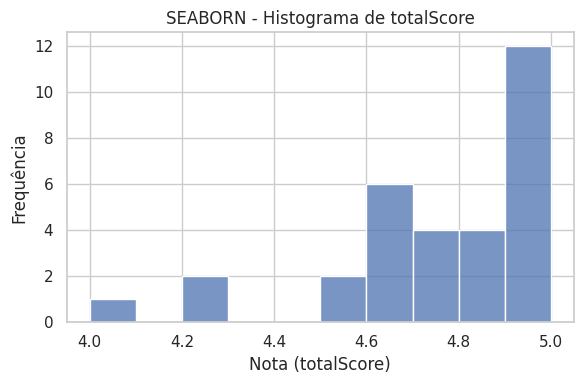

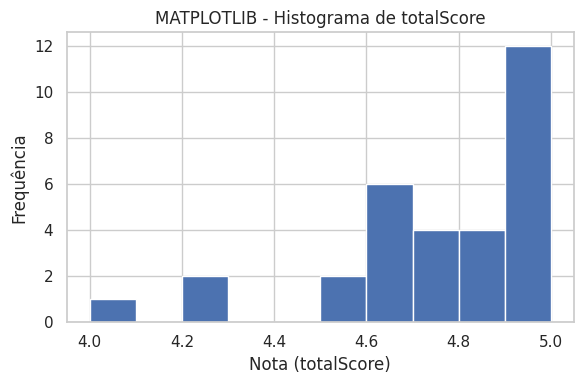

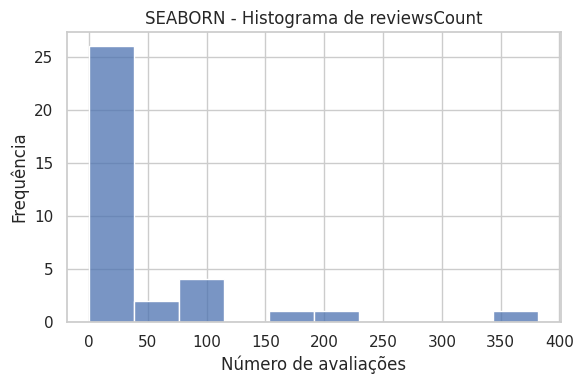

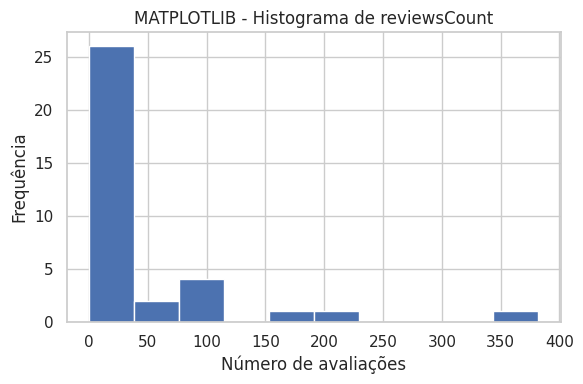

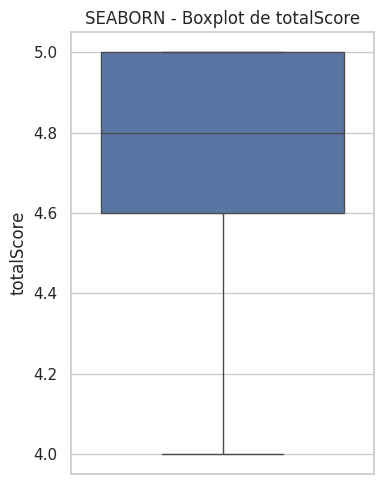

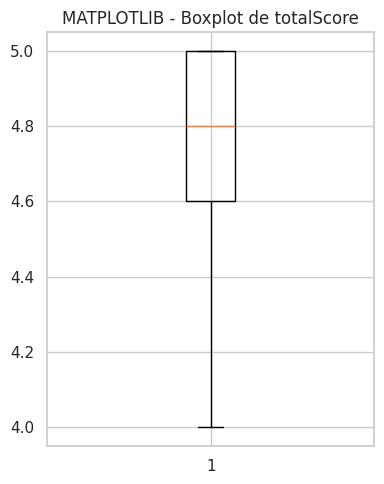

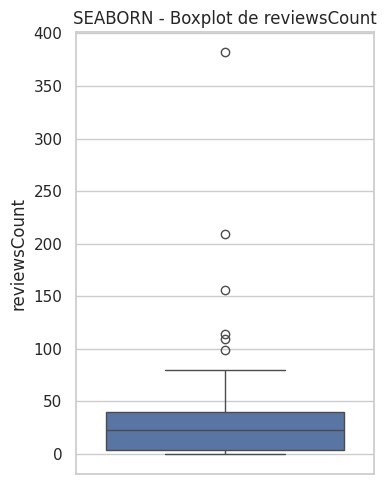

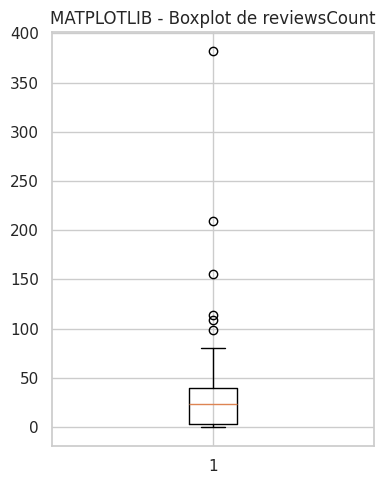

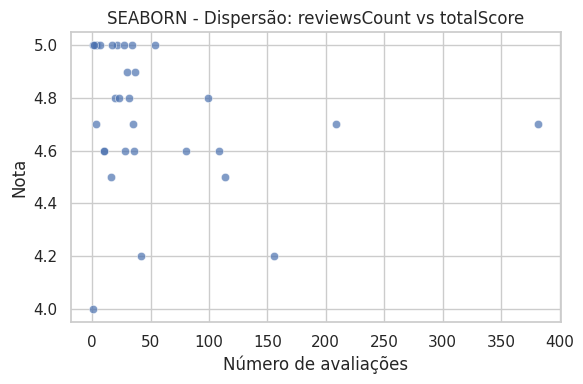

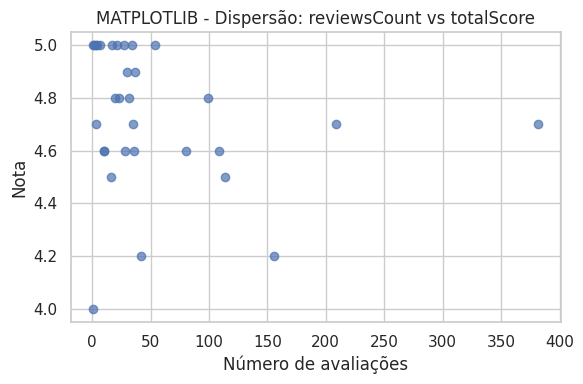

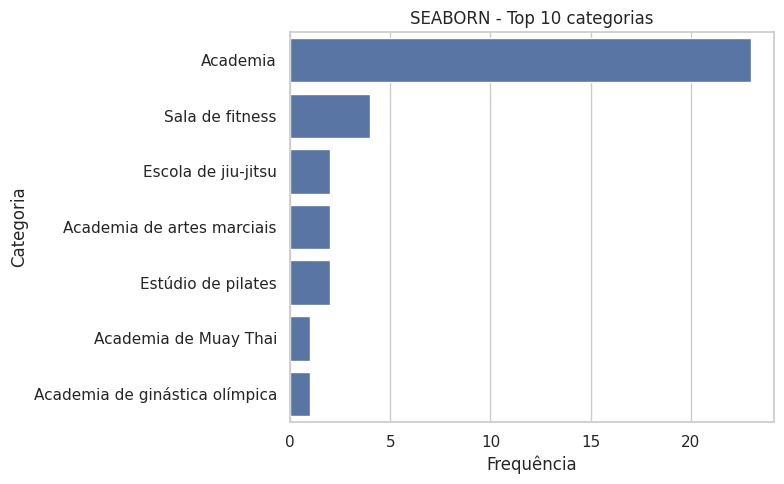

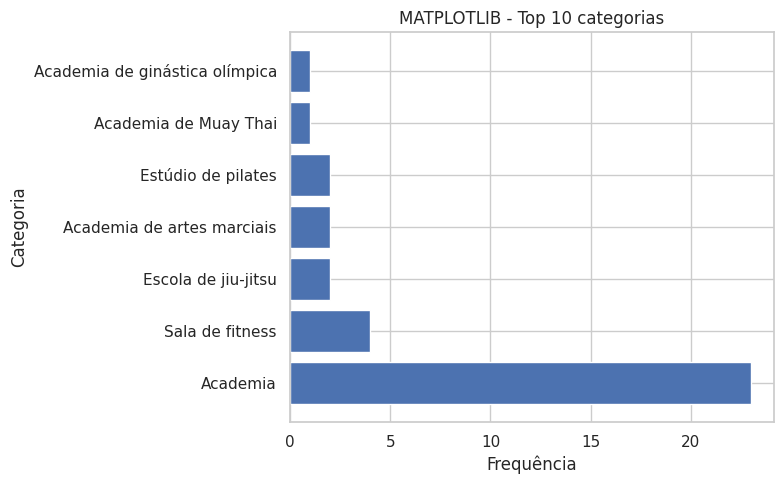

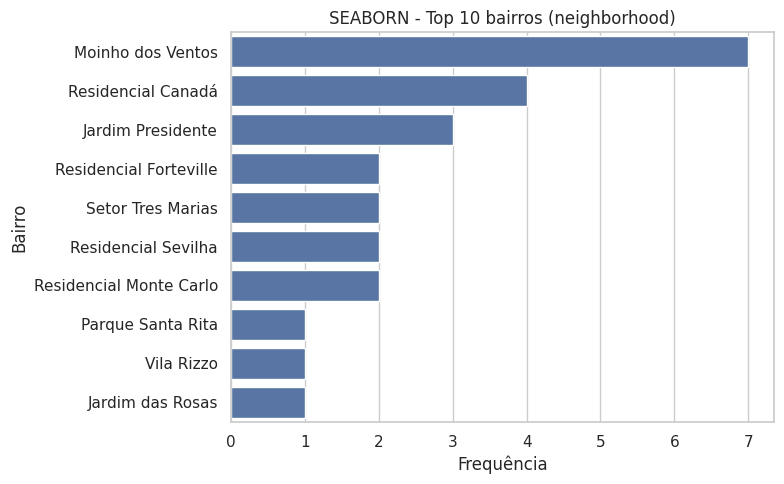

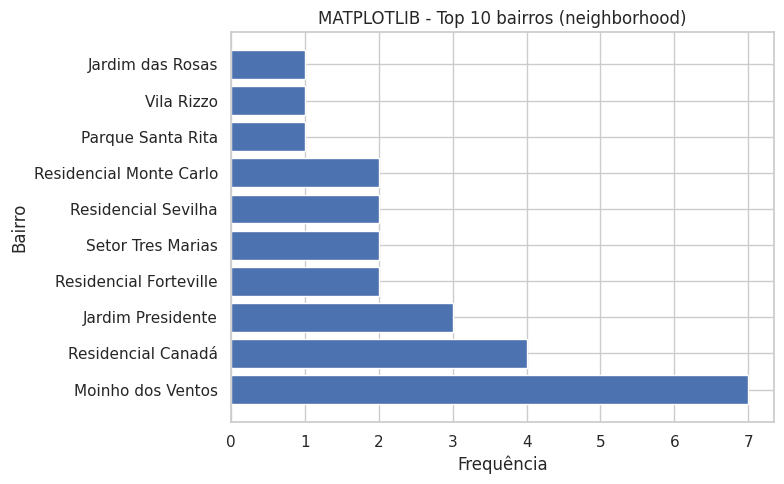

In [12]:
# ==========================================================
# 5) CONTAGEM DE VALORES (.value_counts) EM COLUNAS RELEVANTES
# ==========================================================

colunas_para_contagem = []

if "categoryName" in df.columns:
    colunas_para_contagem.append("categoryName")

if "neighborhood" in df.columns:   # substituindo city, pois é sempre Goiânia
    colunas_para_contagem.append("neighborhood")

for col in colunas_para_contagem:
    vc = df[col].value_counts(dropna=False)

    print(f"\n=== VALUE_COUNTS: {col} ===")
    print(vc)

    vc_df = vc.reset_index()
    vc_df.columns = [col, "frequencia"]



# ==========================================================
# 6) DETECÇÃO DE OUTLIERS (IQR)
# ==========================================================

def detectar_outliers_iqr(serie):
    serie_num = pd.to_numeric(serie, errors="coerce")

    Q1 = serie_num.quantile(0.25)
    Q3 = serie_num.quantile(0.75)
    IQR = Q3 - Q1

    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    mascara = (serie_num < lim_inf) | (serie_num > lim_sup)

    return pd.DataFrame({
        "valor": serie_num,
        "e_outlier": mascara,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "limite_inferior": lim_inf,
        "limite_superior": lim_sup
    })

# analisaremos: reviewsCount, totalScore, rank (todas existem no seu dataset)
colunas_para_outliers = [c for c in ["reviewsCount", "totalScore", "rank"] if c in df.columns]

for col in colunas_para_outliers:
    resultado_out = detectar_outliers_iqr(df[col])
    qtd_out = int(resultado_out["e_outlier"].sum())

    print(f"\n=== OUTLIERS via IQR em '{col}' ===")
    print(f"Total de outliers encontrados: {qtd_out}")
    print("Exemplos de outliers:")
    print(resultado_out[resultado_out["e_outlier"]].head())



# ==========================================================
# 7) VISUALIZAÇÕES (SEABORN + MATPLOTLIB)
# ==========================================================

# --------------------------
# HISTOGRAMAS
# --------------------------

if "totalScore" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x="totalScore", bins=10)
    plt.title("SEABORN - Histograma de totalScore")
    plt.xlabel("Nota (totalScore)")
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    plt.hist(df["totalScore"].dropna(), bins=10)
    plt.title("MATPLOTLIB - Histograma de totalScore")
    plt.xlabel("Nota (totalScore)")
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()


if "reviewsCount" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x="reviewsCount", bins=10)
    plt.title("SEABORN - Histograma de reviewsCount")
    plt.xlabel("Número de avaliações")
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    plt.hist(pd.to_numeric(df["reviewsCount"], errors="coerce").dropna(), bins=10)
    plt.title("MATPLOTLIB - Histograma de reviewsCount")
    plt.xlabel("Número de avaliações")
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()


# --------------------------
# BOXPLOTS
# --------------------------

if "totalScore" in df.columns:
    plt.figure(figsize=(4,5))
    sns.boxplot(y=pd.to_numeric(df["totalScore"], errors="coerce"))
    plt.title("SEABORN - Boxplot de totalScore")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(4,5))
    plt.boxplot(pd.to_numeric(df["totalScore"], errors="coerce").dropna(), vert=True)
    plt.title("MATPLOTLIB - Boxplot de totalScore")
    plt.tight_layout()
    plt.show()


if "reviewsCount" in df.columns:
    plt.figure(figsize=(4,5))
    sns.boxplot(y=pd.to_numeric(df["reviewsCount"], errors="coerce"))
    plt.title("SEABORN - Boxplot de reviewsCount")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(4,5))
    plt.boxplot(pd.to_numeric(df["reviewsCount"], errors="coerce").dropna(), vert=True)
    plt.title("MATPLOTLIB - Boxplot de reviewsCount")
    plt.tight_layout()
    plt.show()


# --------------------------
# SCATTERPLOT (reviewsCount × totalScore)
# --------------------------

if ("reviewsCount" in df.columns) and ("totalScore" in df.columns):
    plt.figure(figsize=(6,4))
    sns.scatterplot(
        x=pd.to_numeric(df["reviewsCount"], errors="coerce"),
        y=pd.to_numeric(df["totalScore"], errors="coerce"),
        alpha=0.7
    )
    plt.title("SEABORN - Dispersão: reviewsCount vs totalScore")
    plt.xlabel("Número de avaliações")
    plt.ylabel("Nota")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    plt.scatter(
        pd.to_numeric(df["reviewsCount"], errors="coerce"),
        pd.to_numeric(df["totalScore"], errors="coerce"),
        alpha=0.7
    )
    plt.title("MATPLOTLIB - Dispersão: reviewsCount vs totalScore")
    plt.xlabel("Número de avaliações")
    plt.ylabel("Nota")
    plt.tight_layout()
    plt.show()



# ==========================================================
# GRÁFICOS DE BARRAS (CATEGORYNAME + NEIGHBORHOOD)
# ==========================================================

TOP_N = 10

# -------- categoryName --------
if "categoryName" in df.columns:
    vc_cat = df["categoryName"].value_counts().head(TOP_N)

    plt.figure(figsize=(8,5))
    sns.barplot(x=vc_cat.values, y=vc_cat.index)
    plt.title(f"SEABORN - Top {TOP_N} categorias")
    plt.xlabel("Frequência")
    plt.ylabel("Categoria")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8,5))
    plt.barh(vc_cat.index, vc_cat.values)
    plt.title(f"MATPLOTLIB - Top {TOP_N} categorias")
    plt.xlabel("Frequência")
    plt.ylabel("Categoria")
    plt.tight_layout()
    plt.show()


# -------- neighborhood (bairros) --------
if "neighborhood" in df.columns:
    vc_nei = df["neighborhood"].value_counts().head(TOP_N)

    plt.figure(figsize=(8,5))
    sns.barplot(x=vc_nei.values, y=vc_nei.index)
    plt.title(f"SEABORN - Top {TOP_N} bairros (neighborhood)")
    plt.xlabel("Frequência")
    plt.ylabel("Bairro")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8,5))
    plt.barh(vc_nei.index, vc_nei.values)
    plt.title(f"MATPLOTLIB - Top {TOP_N} bairros (neighborhood)")
    plt.xlabel("Frequência")
    plt.ylabel("Bairro")
    plt.tight_layout()
    plt.show()




================ REGRESSÃO LINEAR ==================
Coeficiente (inclinação): -0.000706
Intercepto: 4.772872
R² do modelo: 0.043290



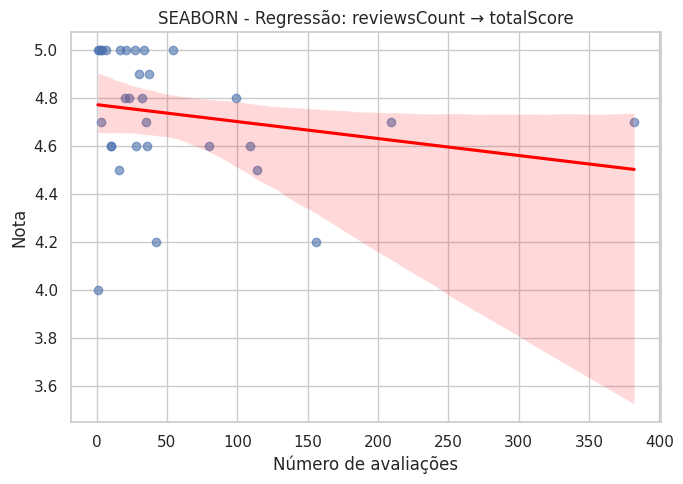

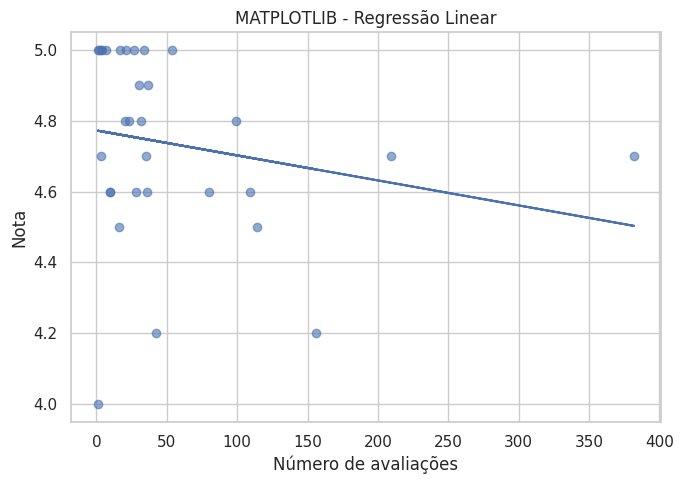

Se uma academia tiver 1000 avaliações, a nota estimada é: 4.07


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
# ==========================================================
# 8) REGRESSÃO LINEAR: reviewsCount → totalScore
# ==========================================================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Garantir que são numéricos
df["reviewsCount_num"] = pd.to_numeric(df["reviewsCount"], errors="coerce")
df["totalScore_num"] = pd.to_numeric(df["totalScore"], errors="coerce")

# Remover linhas vazias
df_reg = df.dropna(subset=["reviewsCount_num", "totalScore_num"]).copy()

X = df_reg[["reviewsCount_num"]]
y = df_reg["totalScore_num"]

# Criar modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Prever
y_pred = modelo.predict(X)

# Métricas
r2 = r2_score(y, y_pred)
coef = modelo.coef_[0]
intercept = modelo.intercept_

print("\n================ REGRESSÃO LINEAR ==================")
print(f"Coeficiente (inclinação): {coef:.6f}")
print(f"Intercepto: {intercept:.6f}")
print(f"R² do modelo: {r2:.6f}")
print("====================================================\n")

# ----------------------------------------------------------
# GRÁFICOS DA REGRESSÃO
# ----------------------------------------------------------

# -------- Seaborn --------
plt.figure(figsize=(7,5))
sns.regplot(
    x=df_reg["reviewsCount_num"],
    y=df_reg["totalScore_num"],
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)
plt.title("SEABORN - Regressão: reviewsCount → totalScore")
plt.xlabel("Número de avaliações")
plt.ylabel("Nota")
plt.tight_layout()
plt.show()

# -------- Matplotlib --------
plt.figure(figsize=(7,5))
plt.scatter(df_reg["reviewsCount_num"], df_reg["totalScore_num"], alpha=0.6)
plt.plot(df_reg["reviewsCount_num"], y_pred)  # linha de regressão
plt.title("MATPLOTLIB - Regressão Linear")
plt.xlabel("Número de avaliações")
plt.ylabel("Nota")
plt.tight_layout()
plt.show()


# ----------------------------------------------------------
# PREVISÃO DE EXEMPLO (modifique o valor aqui!)
# ----------------------------------------------------------

valor_exemplo = 1000
nota_prevista = modelo.predict([[valor_exemplo]])[0]

print(f"Se uma academia tiver {valor_exemplo} avaliações, a nota estimada é: {nota_prevista:.2f}")
